# Estimation of aberration and decomposition on a Zernike basis
Example of use of the script [zernikes.py](https://github.com/awojdyla/ALS-U_Examples/blob/master/scripts/zernikes.py)

An OASYS version is available here: [Zernikes.ows](https://github.com/awojdyla/ALS-U_Examples/blob/master/OASYS_examples/Zernikes.ows)

## Run Shadow
Change `oe1.X_ROT` to change the tilt of the mirror and see a change in the Zernike coefficients

In [5]:
# Python script to run shadow3. Created automatically with ShadowTools.make_python_script_from_list().

import Shadow
import numpy

beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()

oe0.FDISTR = 1
oe0.F_COHER = 1
oe0.F_PHOT = 0
oe0.HDIV1 = 0.001
oe0.HDIV2 = 0.001
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 0
oe0.NPOINT = 10000
oe0.PH1 = 603.0
oe0.SIGMAX = 0.0
oe0.SIGMAZ = 0.0
oe0.VDIV1 = 0.001
oe0.VDIV2 = 0.001

oe1.DUMMY = 100.0
oe1.FHIT_C = 1
oe1.FMIRR = 3
oe1.FWRITE = 1
oe1.F_MOVE = 1
oe1.RLEN1 = 0.1
oe1.RLEN2 = 0.1
oe1.RWIDX1 = 0.0025
oe1.RWIDX2 = 0.0025
oe1.T_IMAGE = 2.2
oe1.T_INCIDENCE = 88.5
oe1.T_REFLECTION = 88.5
oe1.T_SOURCE = 5.0
oe1.X_ROT = 0.0057

oe2.ALPHA = 90.0
oe2.DUMMY = 100.0
oe2.FWRITE = 3
oe2.F_REFRAC = 2
oe2.T_IMAGE = -1.0
oe2.T_INCIDENCE = 90.0
oe2.T_REFLECTION = 90.0
oe2.T_SOURCE = 0.0

beam.genSource(oe0)
beam.traceOE(oe1,1)
beam.traceOE(oe2,2)


## Define the script

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

def zernike_projection(beam, Nx=101, Nz=101, N_zern= 8):
	x = beam.getshonecol(1)
	z = beam.getshonecol(3)
	path = beam.getshonecol(13)

	x_lin = np.linspace(np.min(x), np.max(x), Nx)
	z_lin = np.linspace(np.min(z), np.max(z), Nx)
	X, Z = np.meshgrid(x_lin,z_lin)
	wfe = interpolate.griddata((x,z),path,(X,Z),method='linear')

	import sys
	import numpy
	sys.path.insert(0,"/Users/awojdyla/python/poppy/")

	from poppy import zernike
	# commented import astropy and import poppy_core in poppy repo

	#4 defocus
	mask2 = np.where(numpy.isnan(wfe))
	wfe_proj = wfe.copy()
	wfe_proj[mask2] = 0

	N_Zern = 8
	#define an aperture for the Zernike basis (non-nans)
	aperture = wfe.copy()*0+1
	aperture[mask2] = 0
	ZZ = zernike.arbitrary_basis(aperture, nterms=N_Zern, rho=None, theta=None, outside=0)

	proj = np.zeros(N_Zern)
	for i in np.arange(N_Zern):
	    Zerni = ZZ[i,:,:]/np.sqrt(np.sum(ZZ[i,:,:]*ZZ[i,:,:]))
	    proj[i] = np.sum(wfe_proj*Zerni)

	proj[0]=0;

	fig = plt.stem(np.arange(N_Zern), proj*1e3)
	plt.title("Zernike projections")
	plt.xlabel("Noll index")
	plt.ylabel("coefficient [a.u.]")
	plt.show()

	return proj

## Decompose onto a Zernike basis

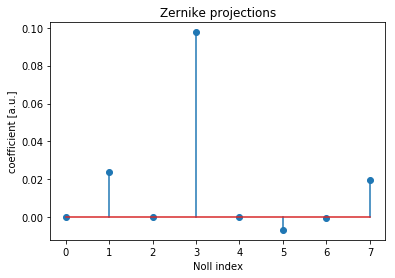

array([ 0.00000000e+00,  2.39081982e-05,  2.27386607e-07,  9.76459957e-05,
        4.21357562e-08, -6.77148797e-06, -2.24870334e-07,  1.96457799e-05])

In [10]:
zernike_projection(beam)